## Import required libraries

In [1]:
import pandas as pd
import numpy as np

import yfinance as yf
#Fix for yahoo finance integer error
yf.pdr_override() 


import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr


## Problem statement 

Start by generating 2 arrays - we are looking to find the volaility using uneployment rates
<br>We want monthly data from 2005 till now

In [2]:
#unemployment data array
unemp = pd.read_csv(r'C:\Users\nik10\Desktop\iCloud new\Self development\Quant\Projects\Gradient Descent using Unemployment Rate & Vix/UNRATE.csv')
unemp = unemp[(unemp['DATE'] >= '2005-01-01') & (unemp['DATE'] <= '2022-12-01')].reset_index(drop=True)
unemp = unemp.rename({'DATE': 'Date','UNRATE':'UnRate'}, axis=1)
unemp = unemp.UnRate
unemp


0      5.3
1      5.4
2      5.2
3      5.2
4      5.1
      ... 
211    3.7
212    3.5
213    3.7
214    3.6
215    3.5
Name: UnRate, Length: 216, dtype: float64

In [3]:
#Monthly vix array
end = dt.datetime.now()
start = dt.datetime(2005,1,1) 
vix = pdr.get_data_yahoo('^VIX',start, end)

#Get monthly close average
vix = vix.groupby(pd.Grouper(freq='MS'))['Close'].mean()

#Convert to df, reset index, adjust time and select range
vix = pd.DataFrame(vix, columns=['Close']).reset_index(drop=False)
#vix['Date'] = vix['Date'].dt.strftime('%Y-%m-%d')
vix = vix[(vix['Date'] >= '2005-01-01') & (vix['Date'] <= '2022-12-01')]

#Select just Close column
vix = vix.Close

#pd.merge(unemp, vix, on='Date', how = 'inner') #- merge vix and index under one dataframe if needed
vix

[*********************100%***********************]  1 of 1 completed


0      13.438000
1      11.708947
2      13.126364
3      14.459048
4      13.967619
         ...    
211    22.169565
212    27.406190
213    30.005714
214    23.436191
215    21.784286
Name: Close, Length: 216, dtype: float64

## Plotting The data

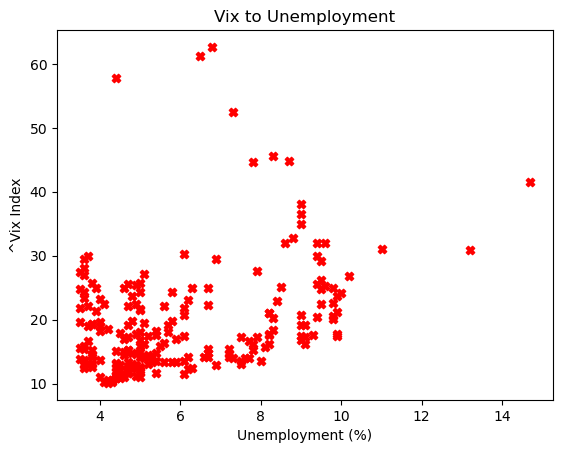

In [4]:
plt.scatter(unemp,vix,  marker='X', c='r')
plt.title("Vix to Unemployment")
# Set the y-axis label
plt.xlabel('Unemployment (%)')
# Set the x-axis label
plt.ylabel('^Vix Index')
plt.show()

## Model the function for linear regression
Model linear regression where Unemployment rate is the target 
<br>
$x$ - unemployment (%)
<br>
$y$ - ^vix index
<br>
Training example targets and input: $x$ and $y$ as  `x_i`, `y_i`
<br> $y^{(i)}$ notation is $i$ training example
<br> L - Gradient descent learning rate
<br> $m$ - number of training examples
<br>Unemployment is one of input variables as  $x^{(i)}$
<br> $w$ - Gradient of linear regression function (model parameter 1)
<br> $b$ - Constant of linear regression function (model parameter 2)
<br> Regression function - $f_{w,b}(x^{(i)})= w*x^{(i)} + b$  

In [5]:
x_train = unemp.to_numpy()
y_train = vix.to_numpy()
#print(f"x_train = {x_train}") - use to check
#print(f"y_train = {y_train}")

m = len(x_train)
print(f"Total number of training examples is: {m}")

Total number of training examples is: 216


In [6]:
#check that training example responds to index
i = 1

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(1), y^(1)) = (5.4, 11.708947482861971)


Text(0.5, 0, 'Unemployment')

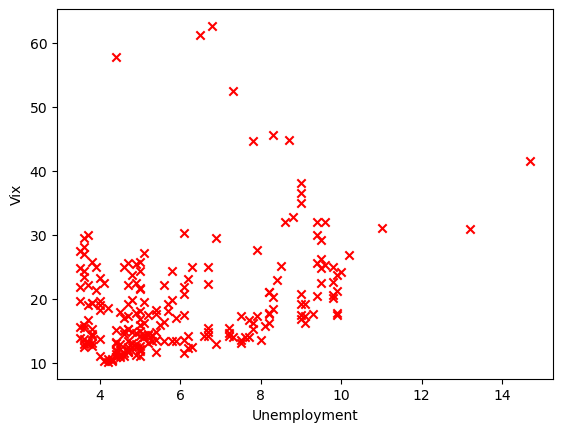

In [7]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the y-axis label
plt.ylabel('Vix')
# Set the x-axis label
plt.xlabel('Unemployment')

## Computing cost function for gradient descent
Cost functions measures how well model predicts the target price of the house

The equation for cost:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b $$
  
 $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
 $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
 These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$. 

Our goal is  $min J(w,b)$ -  we want to find the smallest error possible

## Manual calculation practice

In [8]:
#Creates manual prediction for the model
w = 5
b = 10
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

#enter unemployment level
x_i = 10
vix_prediction = w * x_i + b    

print(f"{vix_prediction:0.1f} ")

60.0 


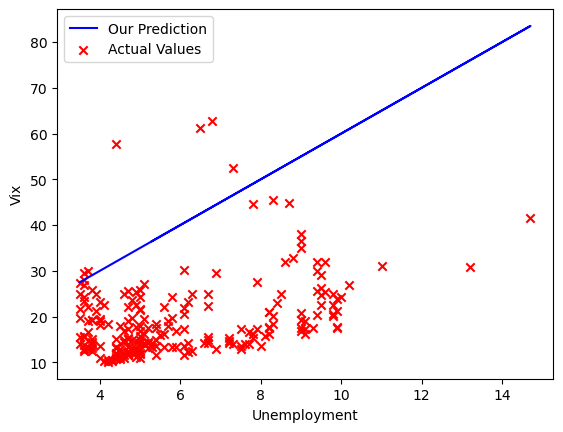

In [9]:
#Plots the output for prediction vs actual values
tmp_f_wb = compute_model_output (x_train , w, b,)

plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the y-axis label
plt.ylabel('Vix')
# Set the x-axis label
plt.xlabel('Unemployment')

plt.legend()
plt.show()

## Gradient descent implementation

In [27]:
#Choose starting values
b = 0
w = 0

#Define learning rate
L = 0.001
#Number of iterations for gradient descent
epochs = 216
#Number of elements in X
m = len(x_train)

for i in range (epochs):
        f_wb = w*x_train + b
        D_w = (-2/m)* sum(x_train*(y_train-f_wb)) #Derivative of W
        D_b = (-2/m)* sum(y_train-f_wb) #Derivative of B
        w = w - L * D_w #Update W
        b = b - L * D_b # Update B
                
   
print(w,b)


2.9019227493388127 0.8986634240221579


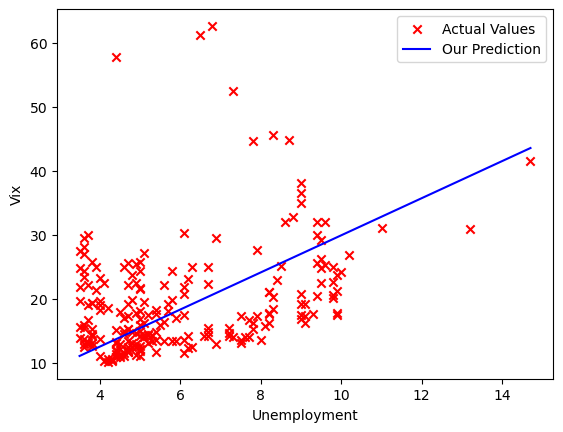

In [11]:
#Plot the prediction
f_wb = w*x_train + b

plt.scatter(x_train,y_train,marker = 'x', c = 'r',label='Actual Values')
plt.plot([min(x_train),max(x_train)],[min(f_wb),max(f_wb)],c = 'b',label='Our Prediction') #regression line

# Set the y-axis label
plt.ylabel('Vix')
# Set the x-axis label
plt.xlabel('Unemployment')

plt.legend()
plt.show()

## Implement cost function

In [28]:
m = x_train.shape[0] 
cost_sum = 0 

for i in range(m): 
        f_wb = w * x_train[i] + b   
        cost = (f_wb - y_train[i]) ** 2  
        cost_sum = cost_sum + cost
total_cost = (1 / (2 * m)) * cost_sum  

 #print gradient descent journey
print(total_cost)

37.72029299033352


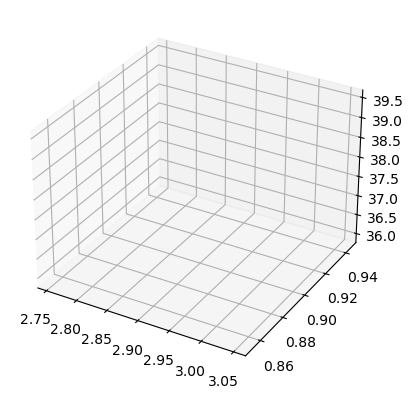

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.plot(w,b, total_cost)

## Compute gradient